# Midterm Exam
- **Author:** Deana Baron
- **Date:** 4/12/19
***
## Introduction 
For the midterm you will use the fluxnet hourly/daily/monthly/annual data  to find what variables influence the net ecosystem exchanges. These factors include both environmental factors such as air temperation, humidity, and precipitation and biophysical parameters such as land surface type, LAI and light use efficiency and other parameters. I attached two papers on this topic. We will search for answers for the three questions listed in the Baldocchi's paper 

1. how variable are carbon fluxes on a year to year basis? 
2. what are the biophysical factors that may cause interannual variability and/or temporal trends in carbon fluxes?;
3. how does the biophysical control on this carbon flux variability differ by climate and ecological spaces?

You will use both annual and monthly/daily flux data.  All the detail can be found at  https://fluxnet.fluxdata.org/data/fluxnet2015-dataset/). Here is the list of variables of each file - https://fluxnet.fluxdata.org/data/fluxnet2015-dataset/subset-data-product/ and here is the list of sites - https://fluxnet.fluxdata.org/sites/site-list-and-pages/. I downloaded 8 sites of fluxe data. These sites range from US, Canada, Europe and Australia.You are only required to choose two sites for the analysis. Of course. Here are the details of each site:

`http://sites.fluxdata.org/US-Ha1/
http://sites.fluxdata.org/US-MMS/
http://sites.fluxdata.org/US-Ton/
http://sites.fluxdata.org/FI-Hyy/
http://sites.fluxdata.org/AU-Tum/
http://sites.fluxdata.org/CA-Obs/
http://sites.fluxdata.org/US-Var/
http://sites.fluxdata.org/GF-Guy/`

The data are stored at 'http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/Data4Midterm.zip' as zip file. You can download the zip file and unzip it mannualy on your local drive. You can also use Python to access the zip file and pandas directly read the zip 
file into pandas dataframes.

## Part III - Daily Data Analysis - 15 pts
Repeat Part I(5pts), and are the answers to Questions #1-3 changed on the daily scale comparing to what you obsere in Part I and Part II?(10pts) 

In [1]:
# import necessary libraries
import os
import urllib.request
from glob import glob
import zipfile
from fnmatch import fnmatch
import pandas as pd
import matplotlib.pyplot as plt

# print statement to show success
print("Libraries successfully imported!")

Libraries successfully imported!


In [2]:
# set the current working directory
os.chdir('C:\\Users\\Deana\\Downloads')

# check the current working directory after setting it
os.getcwd()

'C:\\Users\\Deana\\Downloads'

In [3]:
# download the data
urllib.request.urlretrieve(
    url = "http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/Data4Midterm.zip",                  
    filename = "Data4Midterm/Data4Midterm.zip"
)

# unzip the content into a subdirectory
zip_ref = zipfile.ZipFile("Data4Midterm/Data4Midterm.zip", 'r')
zip_ref.extractall()
zip_ref.close()

print("Data successfully downloaded and extracted!")

Data successfully downloaded and extracted!


2. To read the flux data into Pandas dataframes (10pts) - 
   you only need to read the following columns

   flux = pd.read_csv(mysite,parse_dates=['TIMESTAMP'],na_values=['-9999'],
                   usecols=['TIMESTAMP','TA_F','P_F','SW_IN_F','VPD_F','NEE_VUT_REF',
                           'RECO_NT_VUT_REF','GPP_NT_VUT_REF'])
                                
   More on Pandas - https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

In [4]:
# change the current working directory to the subfolder
os.chdir('C:\\Users\\Deana\\Downloads\\Data4Midterm')

# get list of monthly files
filelist = glob("*_DD_*")
print(filelist)

['FLX_AU-Tum_FLUXNET2015_SUBSET_DD_2001-2014_2-3.csv', 'FLX_CA-Obs_FLUXNET2015_SUBSET_DD_1997-2010_1-3.csv', 'FLX_FI-Hyy_FLUXNET2015_SUBSET_DD_1996-2014_1-3.csv', 'FLX_US-Ha1_FLUXNET2015_SUBSET_DD_1991-2012_1-3.csv', 'FLX_US-MMS_FLUXNET2015_SUBSET_DD_1999-2014_1-3.csv', 'FLX_US-Ton_FLUXNET2015_SUBSET_DD_2001-2014_1-3.csv']


In [5]:
# extract all the site names
sites = []
for file in filelist:
    name = file[4:10]
    sites.append(name)
print(sites)

['AU-Tum', 'CA-Obs', 'FI-Hyy', 'US-Ha1', 'US-MMS', 'US-Ton']


In [6]:
# read all daily data into dataframes

data = []
for file in filelist:
    flux = pd.read_csv(file,parse_dates=['TIMESTAMP'], na_values=['-9999'],
                       usecols=['TIMESTAMP','TA_F','P_F','SW_IN_F','VPD_F','NEE_VUT_REF',
                                'RECO_NT_VUT_REF','GPP_NT_VUT_REF'])
    data.append(flux)
print(data)

[      TIMESTAMP    TA_F  SW_IN_F   VPD_F     P_F  NEE_VUT_REF  \
0    2001-01-01  15.946  361.854   9.531   0.000    -2.293750   
1    2001-01-02  17.553  357.510  11.191   0.000    -1.767170   
2    2001-01-03  17.710  252.433   9.561   0.379    -2.113780   
3    2001-01-04  18.867  325.399  10.577   1.212    -2.293750   
4    2001-01-05  17.930  232.757   9.198   1.572    -1.767170   
5    2001-01-06  15.475  239.523   4.396  10.983    -2.113780   
6    2001-01-07  15.164  198.436   4.159   4.140    -2.293750   
7    2001-01-08  14.111  272.916   4.808   0.551    -1.767170   
8    2001-01-09  12.921  353.992   6.703   0.000    -2.113780   
9    2001-01-10  14.641  364.344   7.907   0.000    -2.293750   
10   2001-01-11  17.668  364.576  10.742   0.000    -1.767170   
11   2001-01-12  20.759  342.183  14.944   0.000    -2.113780   
12   2001-01-13  18.240  333.707   8.850   0.000    -2.293750   
13   2001-01-14  19.543  323.844  11.734   0.000    -1.767170   
14   2001-01-15  20.339 

3. Plot the time series of environmental factors (10pts)- air temperature (Ta_F), precipitation (P_F in mm/d for monthly and daily data and mm/y for annual data), vapor pressure deficity (VPD_F in hPa) and imcoming solar radiation (SW_IN_F in W m-2) (10pts)

In [7]:
def plotenvfactors(x):
    """
    function takes a list of pandas dataframes
    function does not take any other kind of variable or type
    output are plots of environmental factors in each dataframe
    """
    for df in x:
        # load the air temp on ax1
        ax1.set(xlabel="Year", ylabel="Air Temperature (degrees Celsius)");
        ax1.plot(df["TIMESTAMP"], df["TA_F"])

        # load the precipitation on ax2
        ax2.set(xlabel="Year", ylabel="Precipitation (mm/day)");
        ax2.plot(df["TIMESTAMP"], df["P_F"])
    
        # load the vapor pressure deficiency on ax3
        ax3.set(xlabel="Year", ylabel="Vapor Pressure Deficiency (hPa)");
        ax3.plot(df["TIMESTAMP"], df["VPD_F"])
        
        # load the incoming solar radiation on ax4
        ax4.set(xlabel="Year", ylabel="Solar Radiation (W m-2)");
        ax4.plot(df["TIMESTAMP"], df["SW_IN_F"])

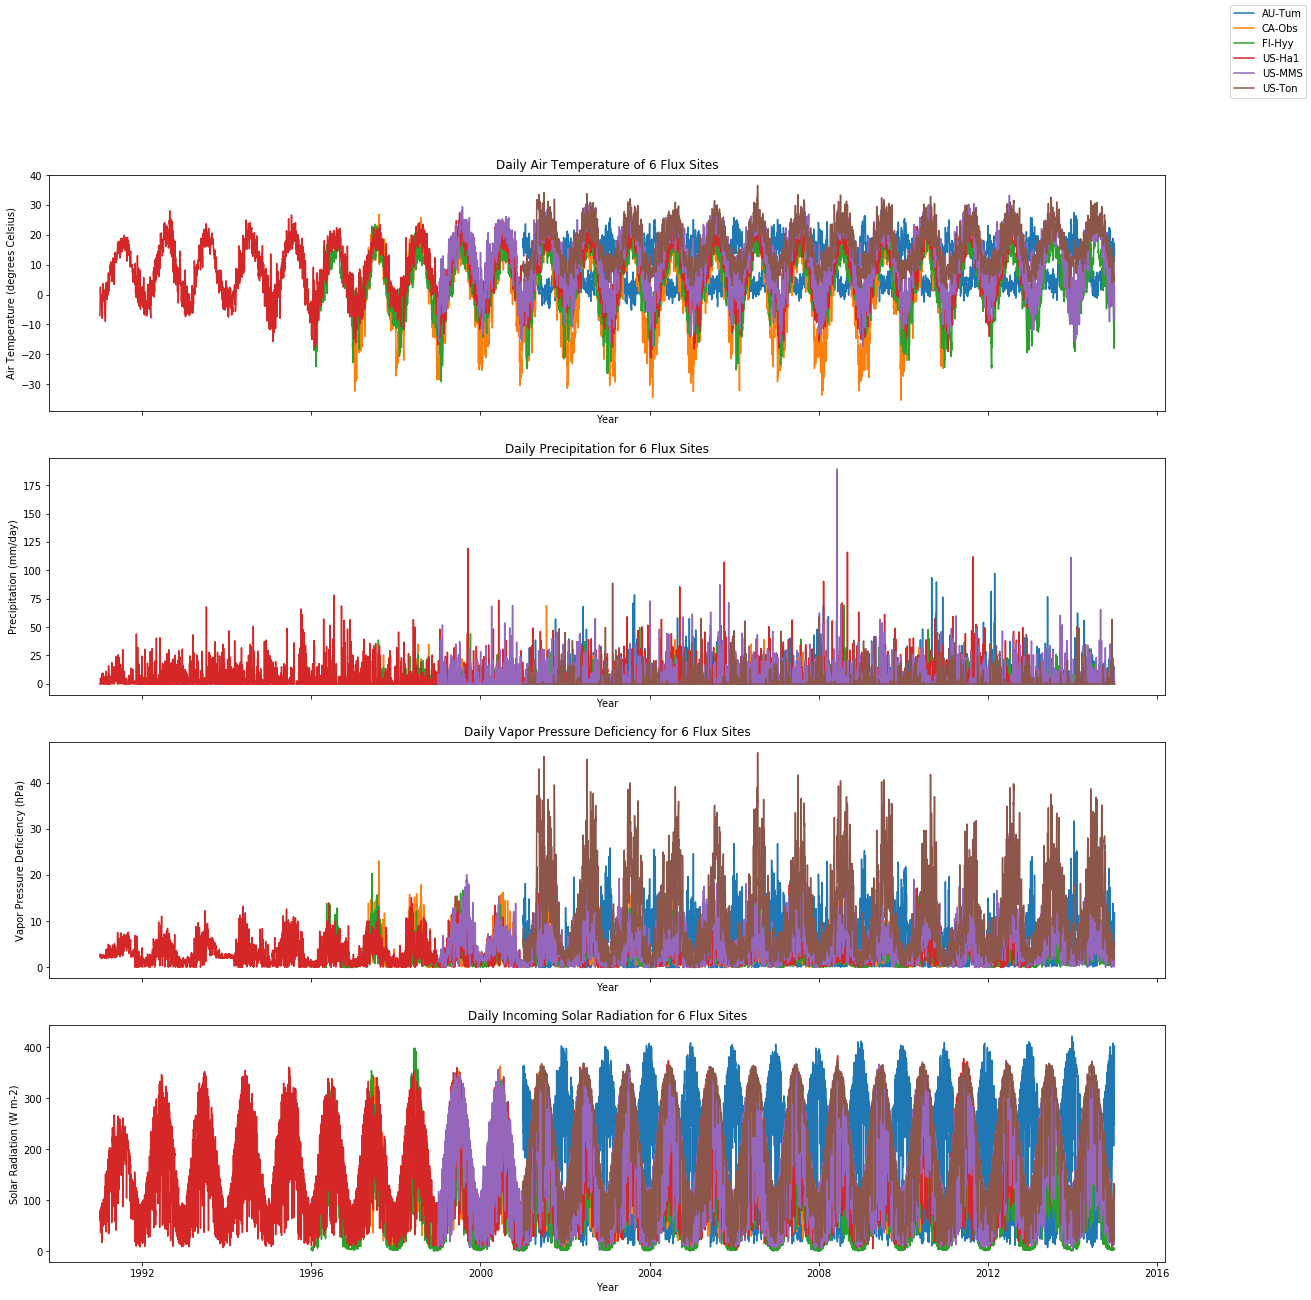

In [9]:
# set parameters for the figure for the overplotting
plt.rcParams["figure.figsize"] = (20, 20)

fig, ([ax1, ax2, ax3, ax4]) = plt.subplots(4, sharex=True)
ax1.set(title="Daily Air Temperature of 6 Flux Sites");
ax2.set(title="Daily Precipitation for 6 Flux Sites");
ax3.set(title="Daily Vapor Pressure Deficiency for 6 Flux Sites");
ax4.set(title="Daily Incoming Solar Radiation for 6 Flux Sites");

# run function on data list
plotenvfactors(data)

# set the legend for the figure
fig.legend((sites));

4. plot the time series of ecosyten variables (10pts)- net ecosystem exchange (NEE_VUT_REF), 
     respiration (RECO_NT_VUT_REF) and gross primariy production (GPP_NT_VUT_REF). 
     The unit for all three is  gC m-2 d-1 for monthly and daily data, gC m-2 y-1 for annual data

In [10]:
# modify the plotenvfactors() function to work for the NEE, RECO, and GPP
def plotecofactors(x):
    """
    function takes a list of pandas dataframes
    function does not take any other kind of variable or type
    output are plots of ecosystem factors in each dataframe
    """
    for df in x:
        # load the NEE on ax1
        ax1.set(xlabel="Year", ylabel="Net Ecosystem Exchange (gC m-2 d-1)");
        ax1.plot(df["TIMESTAMP"], df["NEE_VUT_REF"])

        # load the RECO on ax2
        ax2.set(xlabel="Year", ylabel="Respiration (gC m-2 d-1)");
        ax2.plot(df["TIMESTAMP"], df["RECO_NT_VUT_REF"])
    
        # load the GPP on ax3
        ax3.set(xlabel="Year", ylabel="Gross Primary Production (gC m-2 d-1)");
        ax3.plot(df["TIMESTAMP"], df["GPP_NT_VUT_REF"])

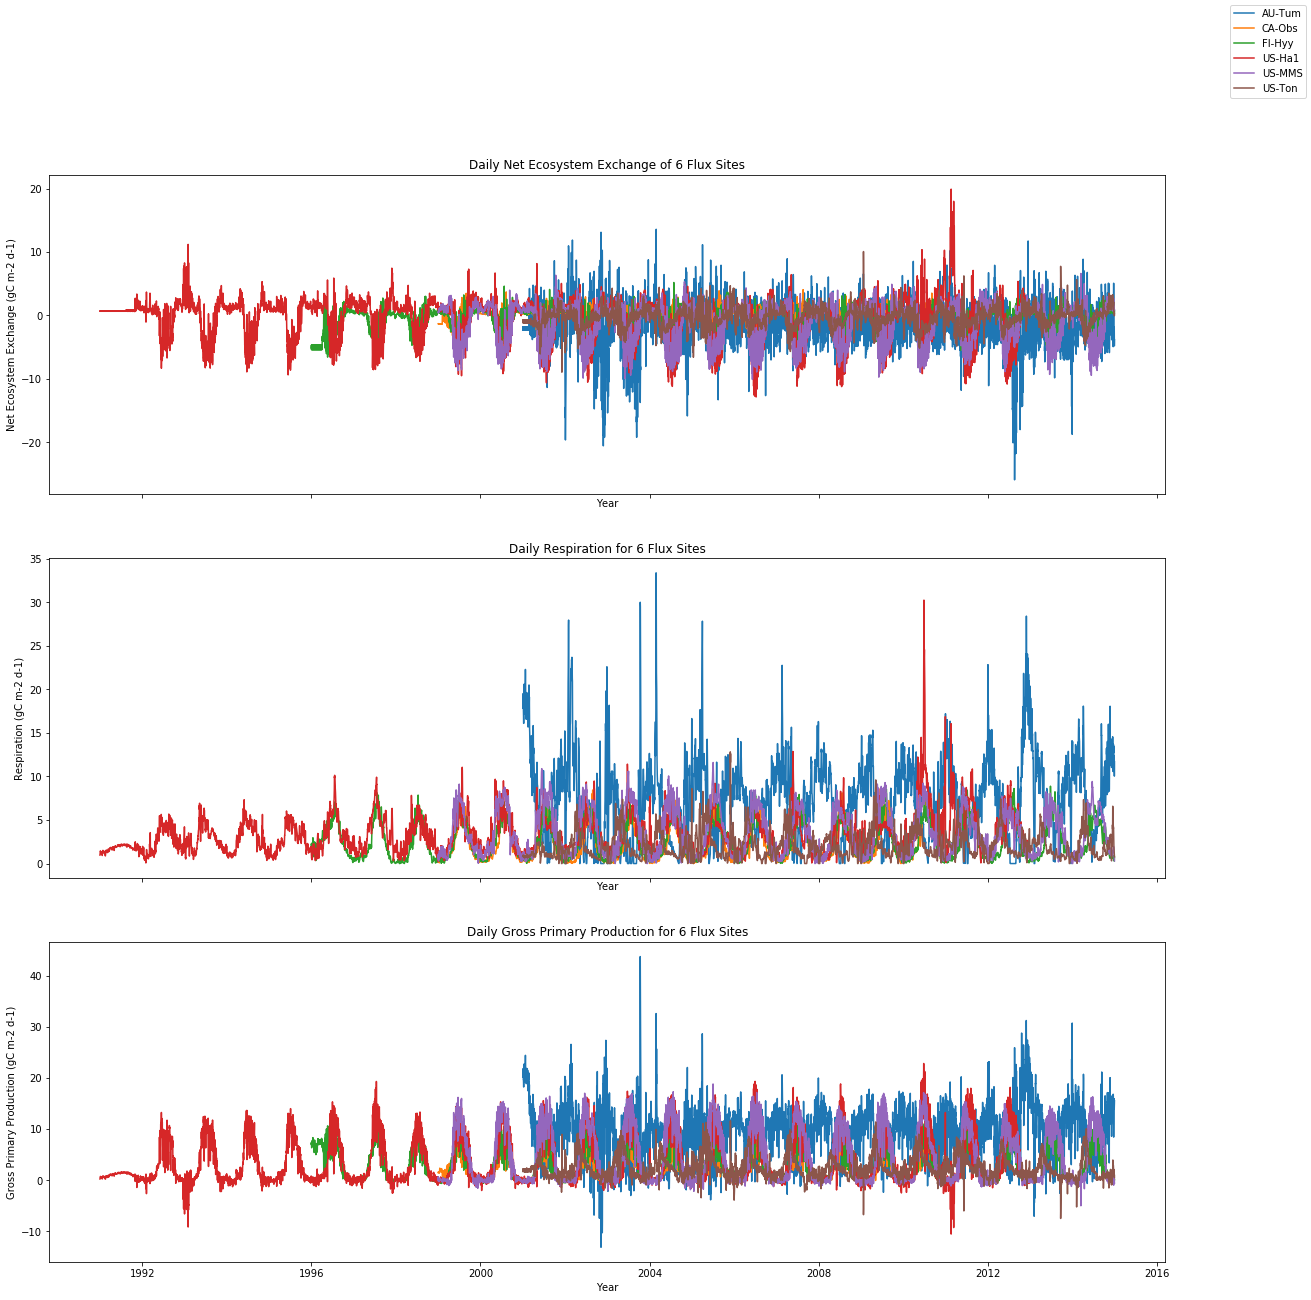

In [11]:
# set parameters for the figure for the overplotting
plt.rcParams["figure.figsize"] = (20, 20)

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
ax1.set(title="Daily Net Ecosystem Exchange of 6 Flux Sites");
ax2.set(title="Daily Respiration for 6 Flux Sites");
ax3.set(title="Daily Gross Primary Production for 6 Flux Sites");

# run function on data list
plotecofactors(data)

# set the legend for the figure
fig.legend((sites));

5. plot the scatter plot between Gross primariy production with environmental factors - air temperature, precipitation, vapor pressure deficity and imcoming solar radiation (10pts)

More on Matplotlib - https://matplotlib.org/tutorials/index.html
https://realpython.com/python-matplotlib-guide/?utm_campaign=Data%2BElixir&utm_medium=email&utm_source=Data_Elixir_172

In [12]:
# write a function for the scatter plot
def fluxscatter(x):
    """
    function takes a list of pandas dataframes
    function does not take any other kind of variable or type
    output are scatter plots of GPP vs env factors
    """
    for df in x:
        # GPP vs air temp
        ax1.set(xlabel="Air Temperature (degrees Celsius)", ylabel="Gross Primary Production (gC m-2 d-1)")
        ax1.scatter(df["TA_F"], df["GPP_NT_VUT_REF"])
        
        # GPP vs precipitation
        ax2.set(xlabel="Precipitation (mm/day)", ylabel="Gross Primary Production (gC m-2 d-1)")
        ax2.scatter(df["P_F"], df["GPP_NT_VUT_REF"])
        
        # GPP vs vapor pressure deficiency
        ax3.set(xlabel="Vapor Pressure Deficiency (hPa)", ylabel="Gross Primary Production (gC m-2 d-1)")
        ax3.scatter(df["VPD_F"], df["GPP_NT_VUT_REF"])
        
        # GPP vs incoming solar radiation
        ax4.set(xlabel="Solar Radiation (W m-2)", ylabel="Gross Primary Production (gC m-2 d-1)")
        ax4.scatter(df["SW_IN_F"], df["GPP_NT_VUT_REF"])

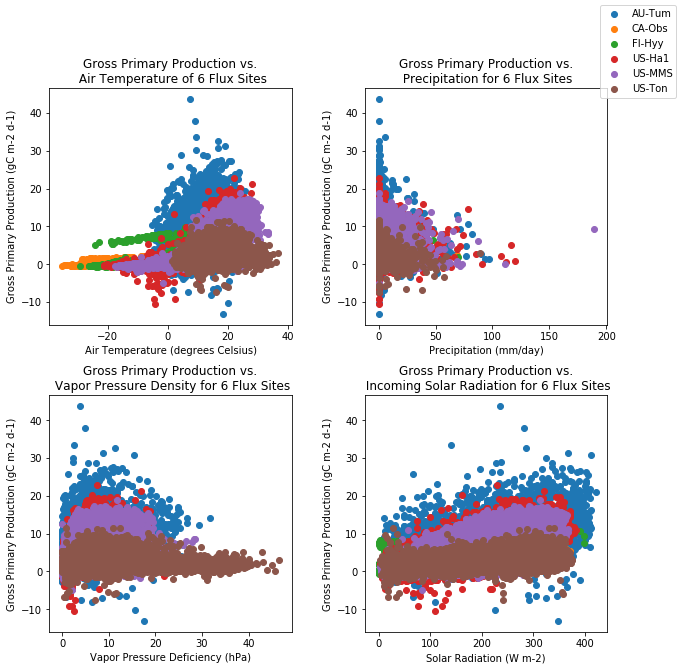

In [13]:
# set parameters for the figure for the overplotting
plt.rcParams["figure.figsize"] = (10, 10)

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
ax1.set(title="Gross Primary Production vs.\n Air Temperature of 6 Flux Sites");
ax2.set(title="Gross Primary Production vs.\n Precipitation for 6 Flux Sites");
ax3.set(title="Gross Primary Production vs.\n Vapor Pressure Density for 6 Flux Sites");
ax4.set(title="Gross Primary Production vs.\n Incoming Solar Radiation for 6 Flux Sites");

# run function on data list
fluxscatter(data)

# set the legend for the figure
fig.legend((sites));

Are the answers to Questions #1-3 changed on the daily scale comparing to what you obsere in Part I and Part II?(10pts) 
- Question 1 (5pts) - Are there any trend and variability of the environmental factors? Do you observe any difference between different sites? 

- Question 2 (5pts)- Are there any trend and variability of the ecosytem variables? Do you observe any  (10pts)  between different sites? 

- Question 3 (5pts)- Are the GPP associated with any of the environmental factors?
***
There aren't as many differences between the daily and monthly data, but definitely between daily and yearly.

1. There aren't many differences here between the monthly and the daily data. The daily data has much more noise, but the seasonal variability through time is still discernible. 

2. Same as above. The same trends seen in the monthly data are apparent here, albeit much more noisy. Nothing new is apparent from this data.

3. The daily data is actually much cleaner in the scatter plot and the relationship between environmental factors and GPP is more apparent. Air temperature peaks around 15-20 degrees Celsius for maximum GPP before dropping off. Precipitation doesn't appear to have much of a relationship. Vapor pressure deficiency peaks around 10 hPa for maximum GPP before dropping off. Solar radation appears to just increase GPP, but the yearly did show a peak and a drop off that is not apparent here.